<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numpyを用いた課題プログラムの作成

最初に下記のコードを実行して，必要なライブラリをインストールする．

In [1]:
pip install pydub

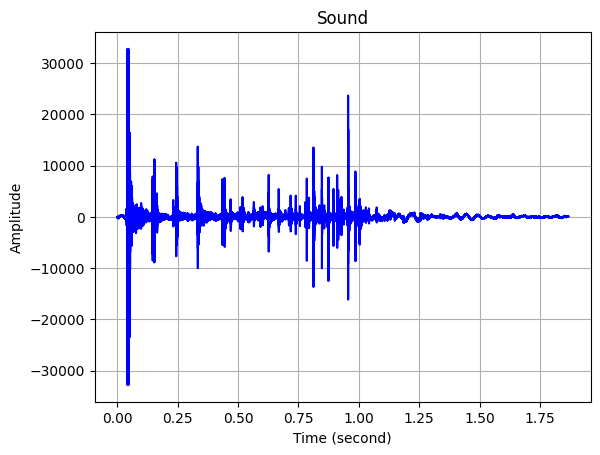

●調べたい周波数(Hz)帯域を入力してください(正の数)
下限1
上限5000

●調べたい時間(秒)範囲を入力してください(0～1.87)
下限0.75
上限0.80

72000 76800
1 250


<function matplotlib.pyplot.show(close=None, block=None)>

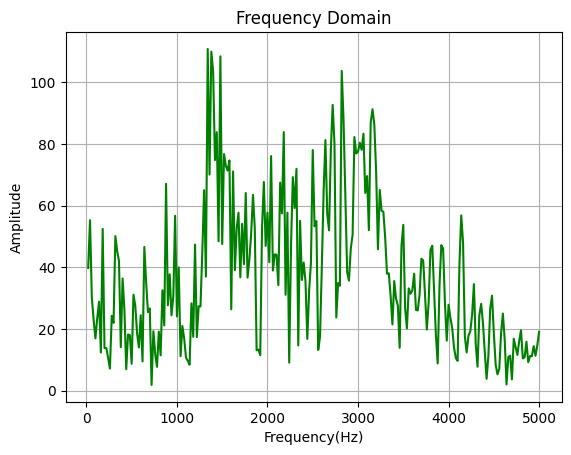

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment

#サンプルファイルのダウンロード

#fname = input("読み込みたいファイル名を入力してください：")
#extension = input("拡張子名を入力してください：")

# 時間領域グラフ 読込/出力
sound = AudioSegment.from_file("pencil_roll.mp3", "mp3")
#sound = AudioSegment.from_file(str(fname)+"."+str(extension), str(extension))
f = sound.get_array_of_samples()
range_t = sound.duration_seconds
t = np.linspace(0, range_t, len(f))
plt.plot(t, f, c="b")
plt.title("Sound")
#plt.title(str(fname))
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("●調べたい周波数(Hz)帯域を入力してください(正の数)")
while True:
  Hz_low = float(input("下限"))
  Hz_up = float(input("上限"))
  if Hz_up > Hz_low and Hz_low > 0:
    break
  elif Hz_up <= Hz_low:
    print("上限値＞下限値 となる様に入力してください．")
  elif Hz_low <= 0:
    print("入力する値は正の数です．")
  else:
    print("正常な値を入力してください．")
print()
print("●調べたい時間(秒)範囲を入力してください(0～"+str(format(range_t,".2f"))+")")
while True:
  s_low = float(input("下限"))
  s_up = float(input("上限"))
  if s_up > s_low and s_low >= 0 and s_up <= range_t:
    break
  elif s_up <= s_low:
    print("上限値＞下限値 となる様に入力してください．")
  elif not(0 <= s_up <= range_t) or not(0 <= s_low <= range_t):
    print("入力の範囲は 0～"+str(format(range_t,".2f"))+"です．")
  else:
    print("正常な値を入力してください．")
print()

# 周波数領域グラフ 計算/出力
amp = np.array([])
Hz = np.array([])
range_low = int(len(f)*s_low / range_t)
range_up = int(len(f)*s_up / range_t)
print(range_low,range_up)#後で消す
T = range_up - range_low
band_low = int(Hz_low*T*range_t / len(f))
band_up = int(Hz_up*T*range_t / len(f))
if band_low <= 0:
  band_low = 1
if band_up <= 0:
  band_up = 2
print(band_low,band_up)#後で消す・帯域がなぜか抽出時間で変わる
for n in range(band_low, band_up+1):
  scos_n = 0
  ssin_n = 0
  for x in range(range_low, range_up):
    scos_n += np.cos(2*n*x*np.pi/T)*(f[x]+f[x+1])/2
    ssin_n += np.sin(2*n*x*np.pi/T)*(f[x]+f[x+1])/2
  a_n = scos_n * 2/T
  b_n = ssin_n * 2/T
  amp = np.append(amp, np.sqrt(a_n**2 + b_n**2))
  Hz = np.append(Hz, n*(Hz_up-Hz_low+1)/(band_up-band_low+1))

#最大振れ幅/周波数表示・調査範囲を分割図示(2行1列)/色表示
#plt.hist(amp, range=(band_low, band_up), bins=(int(band_up)-int(band_low)), label="", color="g")
plt.plot(Hz, amp, c="g")
#plt.legend()
plt.title("Frequency Domain")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show